In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [88]:
#Importing the data

data = pd.read_csv(r"C:\Users\91771\Downloads\Vehicle_Performance_Prediction.csv")
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [89]:
#Checking for Data
data.shape

(398, 9)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [91]:
# There are no NA in the data so we dont need to worry about it
# origin : Country origin should be an object
# cylinders : Should be int and is int
# displacement : Should be int and is int
# horsepower : should be int but is an object
# weight : Should be int and is int
# acceleration : should be float and is float
# year : Should be an int and is an int
# name : is an object and is an object but we would delete it as its just like an ID
# Kilometer_per_liter : Should be a float and is a float as well

# So we need to work on origin and horsepower also we need to drop name column in the database

In [92]:
#Changing Horsepower from object to int

data['horsepower'] = data['horsepower'].apply(pd.to_numeric)

ValueError: Unable to parse string "?" at position 0

In [93]:
# It seems that there is a ? value in the column lets confirm that

flagged_value = data['horsepower'] == '?'
flagged_value.value_counts()

False    392
True       6
Name: horsepower, dtype: int64

In [94]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)
data['horsepower'] = data['horsepower'].apply(pd.to_numeric)

In [95]:
data['horsepower'].dtype # Conversion done successfull with NA's, lets work on the NA part a little later

dtype('float64')

In [96]:
del data['name']

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [98]:
# Lets work on data manipulation part

data['year'].describe() # This data is from the date range 1970 to 1982.
#We can normalise it by substracting it with min to get range of how old or new the car is, since with advancements in technology
#the efficency also increases

count     398.000000
mean     1976.010050
std         3.697627
min      1970.000000
25%      1973.000000
50%      1976.000000
75%      1979.000000
max      1982.000000
Name: year, dtype: float64

In [99]:
data['year'] = data['year'] - data['year'].min()
data['year'].describe()

count    398.000000
mean       6.010050
std        3.697627
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: year, dtype: float64

In [100]:
data['horsepower'].value_counts() # We can see that 150 is the most popular HP but 88 to 90 is also a very popular choice.
# 110, 100 are also popular choices and hence we cannot predict it. 

print('there is',round((6/398)*100,2),'% NA data which can be deleted')

there is 1.51 % NA data which can be deleted


In [101]:
data.dropna(subset = ['horsepower'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [102]:
#All NA's are removed and the data is now clean, lets try and understand the pattern in the data

<Figure size 1440x720 with 0 Axes>

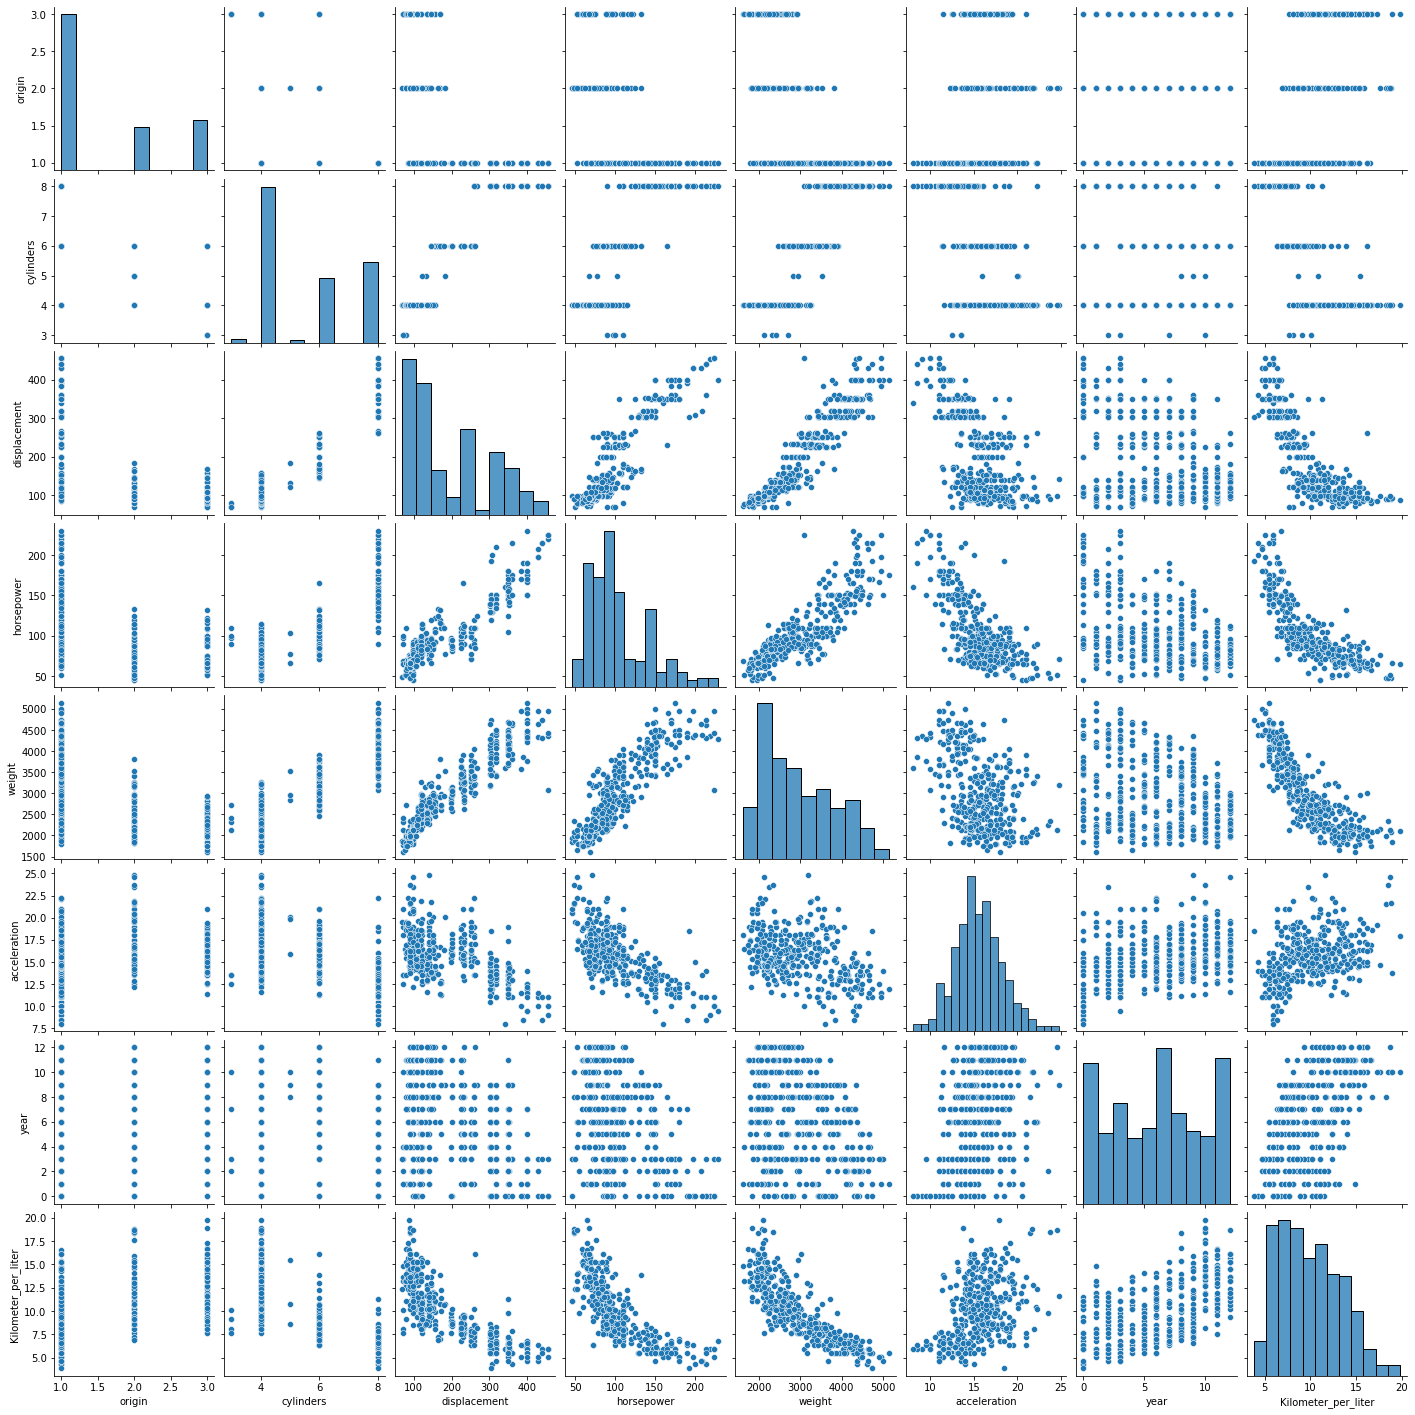

In [103]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(data)
plt.show()

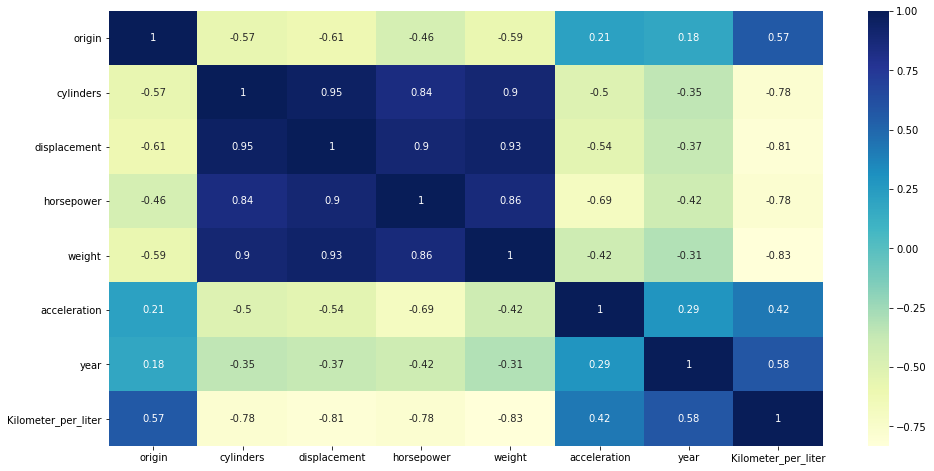

In [104]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [105]:
# So the Y variable KM/L has a strong inverse correlation with cylinders, displacement, horsepower, weight
# Y variable has weak correlations with origin, acceleration and year
# There seems to be a Multicorrelation with weight,horsepower, displacements and cylinder we will investigate this further

In [106]:
#Lets create dummy variable for country of origin as well as

data['origin'] = data['origin'].astype(str)
data_dummies = pd.get_dummies(data['origin'], drop_first=True)
data_dummies.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [107]:
#Changing column names of the newly created columns

data_dummies.columns = ['Origin_two','Origin_three']
data_dummies.columns

Index(['Origin_two', 'Origin_three'], dtype='object')

In [108]:
#Deleting old columns and joining it back

del data['origin']
data = pd.concat([data_dummies,data], axis=1)
data

,Origin_two,Origin_three,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,0,0,8,307.0,130.0,3504,12.0,0,7.652587
1,0,0,8,350.0,165.0,3693,11.5,0,6.377156
2,0,0,8,318.0,150.0,3436,11.0,0,7.652587
3,0,0,8,304.0,150.0,3433,12.0,0,6.802299
4,0,0,8,302.0,140.0,3449,10.5,0,7.227443
...,...,...,...,...,...,...,...,...,...
393,0,0,4,140.0,86.0,2790,15.6,12,11.478880
394,1,0,4,97.0,52.0,2130,24.6,12,18.706323
395,0,0,4,135.0,84.0,2295,11.6,12,13.604599
396,0,0,4,120.0,79.0,2625,18.6,12,11.904024


C:\Users\asharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


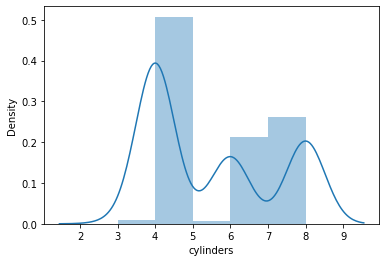

In [109]:
# Lets see the distribution of various datapoints
sns.distplot(data['cylinders'])
plt.show()

C:\Users\asharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


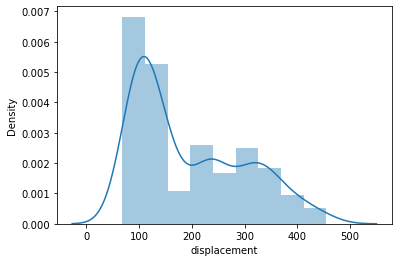

In [110]:
sns.distplot(data['displacement'])
plt.show()

C:\Users\asharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


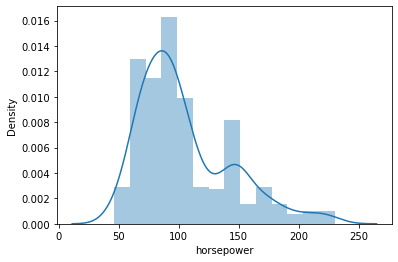

In [111]:
sns.distplot(data['horsepower'])
plt.show()

C:\Users\asharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


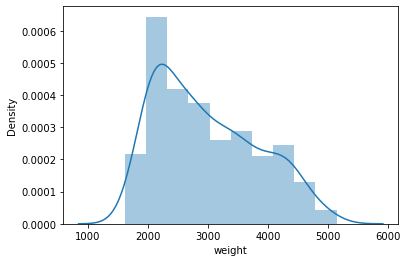

In [112]:
sns.distplot(data['weight'])
plt.show()

C:\Users\asharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


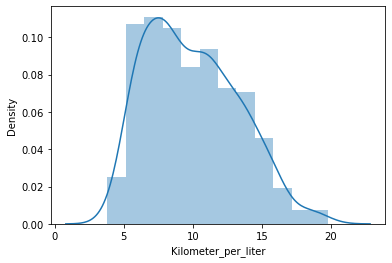

In [113]:
sns.distplot(data['Kilometer_per_liter'])
plt.show()

In [117]:
#Lets Scale the values and start with Model building

# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

#Subsetting data
cols = data[['cylinders','displacement','horsepower','weight','acceleration','year']]

#Scaling Data
X = pd.DataFrame(scale(cols))

#Renaming Dataframe
X.columns = cols.columns

#Testing
scaled_data = pd.concat([data_dummies,X,], axis=1)
scaled_data.head()

,Origin_two,Origin_three,cylinders,displacement,horsepower,weight,acceleration,year
0,0.0,0.0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,0.0,0.0,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,0.0,0.0,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,0.0,0.0,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,0.0,0.0,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


In [118]:
y = data['Kilometer_per_liter']

In [120]:
#Checking if the number of rows are same
len(X) == len(y)

True

In [121]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [127]:
#Checking if the number of rows and columns are same 
print(len(X_test) == len(y_test))
print(len(X_train) == len(y_train))

True
True


#### Ridge and Lasso Regression

Let's now try predicting car milege, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [129]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [179]:
# list of alphas to tune
params = {'alpha': [0.01,0.10,0.100,1,5,10]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.1, 1, 5, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

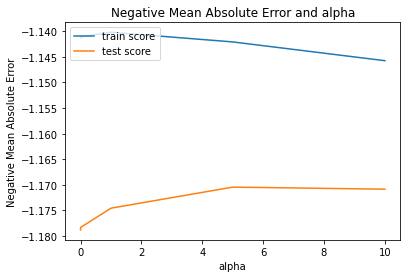

In [181]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [182]:
alpha = 5 # till 5 the difference between train and test is getting smaller and after 5 the error is increasing for both
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.12247883,  0.19574029, -0.38953534, -2.06387523,  0.09218771,
        1.12823026])

#### Lasso

In [205]:
lasso = Lasso()

params = {'alpha': [0.000000001,0.000000010,0.000000100, 0.000001000,0.000010000,0.000100000,0.001000000,0.010000000,0.100000000,0.5]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002425,0.002936,0.001899,0.003299,1e-09,{'alpha': 1e-09},-1.052644,-1.260704,-1.109492,-1.311171,...,-1.178849,0.095178,9,-1.183433,-1.121644,-1.140691,-1.112563,-1.148033,-1.141273,0.024629
1,0.003198,0.003917,0.000000,0.000000,1e-08,{'alpha': 1e-08},-1.052644,-1.260704,-1.109492,-1.311171,...,-1.178849,0.095178,8,-1.183433,-1.121644,-1.140691,-1.112563,-1.148033,-1.141273,0.024629
2,0.000000,0.000000,0.003198,0.003917,1e-07,{'alpha': 1e-07},-1.052643,-1.260704,-1.109492,-1.311170,...,-1.178849,0.095178,7,-1.183433,-1.121644,-1.140691,-1.112563,-1.148033,-1.141273,0.024629
3,0.004797,0.003917,0.000000,0.000000,1e-06,{'alpha': 1e-06},-1.052642,-1.260704,-1.109490,-1.311168,...,-1.178847,0.095178,6,-1.183433,-1.121644,-1.140691,-1.112562,-1.148032,-1.141272,0.024630
4,0.000000,0.000000,0.003198,0.003916,1e-05,{'alpha': 1e-05},-1.052622,-1.260706,-1.109474,-1.311141,...,-1.178834,0.095178,5,-1.183431,-1.121639,-1.140689,-1.112557,-1.148030,-1.141269,0.024631


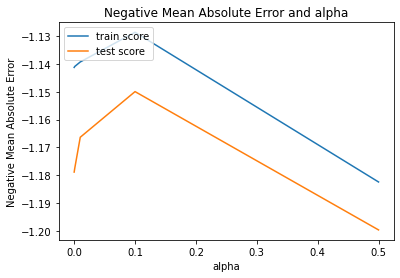

In [202]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [203]:
alpha = 0.1 # We are using 0.1 as at that point both the train test variance is less and error is improving

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.1)

In [204]:
lasso.coef_

array([-0.        , -0.        , -0.28779017, -2.06273926,  0.03677286,
        1.08058196])

#### Elastic Net

In [206]:
elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [207]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002221,0.003128,0.000000,0.000000,1e-09,{'alpha': 1e-09},-1.052644,-1.260704,-1.109492,-1.311171,...,-1.178849,0.095178,9,-1.183433,-1.121644,-1.140691,-1.112563,-1.148033,-1.141273,0.024629
1,0.000000,0.000000,0.003198,0.003917,1e-08,{'alpha': 1e-08},-1.052644,-1.260704,-1.109492,-1.311171,...,-1.178849,0.095178,8,-1.183433,-1.121644,-1.140691,-1.112563,-1.148033,-1.141273,0.024629
2,0.001599,0.003198,0.003199,0.003918,1e-07,{'alpha': 1e-07},-1.052643,-1.260704,-1.109492,-1.311170,...,-1.178849,0.095178,7,-1.183433,-1.121644,-1.140691,-1.112563,-1.148033,-1.141273,0.024629
3,0.001598,0.003196,0.000000,0.000000,1e-06,{'alpha': 1e-06},-1.052641,-1.260704,-1.109491,-1.311167,...,-1.178847,0.095178,6,-1.183433,-1.121644,-1.140691,-1.112562,-1.148032,-1.141272,0.024630
4,0.001599,0.003198,0.000000,0.000000,1e-05,{'alpha': 1e-05},-1.052619,-1.260709,-1.109478,-1.311139,...,-1.178836,0.095178,5,-1.183431,-1.121638,-1.140689,-1.112556,-1.148031,-1.141269,0.024631


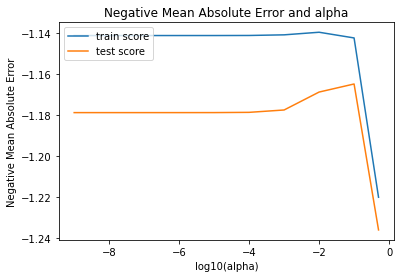

In [208]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [210]:
alpha = -0.5

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=-0.5)

In [218]:
elasticnet.coef_

array([-1.13000060e+203,  1.45689791e+203, -1.62732630e+203,
        1.28726353e+203, -4.25162893e+202,  9.71819656e+200])

### Stochastic Gradient Descent

In [227]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

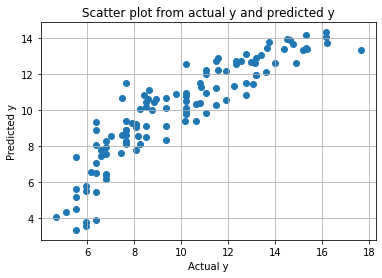

Mean Squared Error : 1.898130413917914
Mean Absolute Error : 1.110432633569178


In [228]:
n_iter=10
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X_train, y_train)
y_pred_sksgd=clf_.predict(X_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred_sksgd))

#### Forward Feature Selection

In [213]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

In [214]:
features = X_train.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['weight'] 
AIC:  301.54415940440134 
BIC:  308.7704156171775
Selected features:  ['weight', 'year'] 
AIC:  159.92891749934148 
BIC:  170.76830181850568
Selected features:  ['weight', 'year', 'year'] 
AIC:  159.92891749934148 
BIC:  170.76830181850568
Selected features:  ['weight', 'year', 'year', 'year'] 
AIC:  159.92891749934148 
BIC:  170.76830181850568
Selected features:  ['weight', 'year', 'year', 'year', 'year'] 
AIC:  159.92891749934148 
BIC:  170.76830181850568
Selected features:  ['weight', 'year', 'year', 'year', 'year', 'year'] 
AIC:  159.92891749934148 
BIC:  170.76830181850568
Selected features:  ['weight', 'year', 'year', 'year', 'year', 'year', 'year'] 
AIC:  159.92891749934148 
BIC:  170.76830181850568
Selected features:  ['weight', 'year', 'year', 'year', 'year', 'year', 'year', 'year'] 
AIC:  159.92891749934148 
BIC:  170.76830181850568
Selected features:  ['weight', 'year', 'year', 'year', 'year', 'year', 'year', 'year', 'year'] 
AIC:  159.9289174

In [215]:
regression.coef_

array([-2.38787974,  0.13427214,  0.13427214,  0.13427214,  0.13427214,
        0.13427214,  0.13427214,  0.13427214,  0.13427214,  0.13427214])